# Importing Libraries

#  <br> <b><u> Problem to be solved:</b></u> Given a dataset containing some text related to a movie, the problem is to predict the sentiment behind the statement in the form of 0 and 1 label (0 for negative and 1 for positive)


In [ ]:
!pip install tensorflow_text

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"roshansalunke","key":"16ea77830d34a254c4d6bb9ed8b6d87d"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download -c llm-detect-ai-generated-text

  0% 0.00/1.38M [00:00<?, ?B/s]
100% 1.38M/1.38M [00:00<00:00, 151MB/s]


In [8]:
! mkdir df

In [9]:
! unzip /content/llm-detect-ai-generated-text.zip -d df

Archive:  /content/llm-detect-ai-generated-text.zip
  inflating: df/sample_submission.csv  
  inflating: df/test_essays.csv      
  inflating: df/train_essays.csv     
  inflating: df/train_prompts.csv    


In [14]:
train_essays  = pd.read_csv('df/train_essays.csv')
test_essays = pd.read_csv('df/test_essays.csv')
train_prompts = pd.read_csv('df/train_prompts.csv')

In [15]:
x = train_essays['text']
y = train_essays['generated']

In [16]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 19.5 MB/s eta 0:00:00


# Installing Tensorflow text library

# Importing Tensorflow libraries

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

# Splitting dataset into training and testing

# Loading Model and Encoder

In [18]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [19]:
from keras.src.layers.attention.multi_head_attention import regularization

# Bulding Model

In [24]:
keras.utils.set_random_seed(42)

text_input = tf.keras.layers.Input(shape=(),  name='text',dtype=tf.string)

preprocessed_text = bert_preprocess(text_input)

output = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(.1, name='dropout1')(output['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid',name='output')(l)


model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [25]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                              

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
fit = model.fit(x, y, epochs=5)

Epoch 1/10
 1/44 [..............................] - ETA: 19:45 - loss: 0.4367 - accuracy: 1.0000

KeyboardInterrupt: ignored

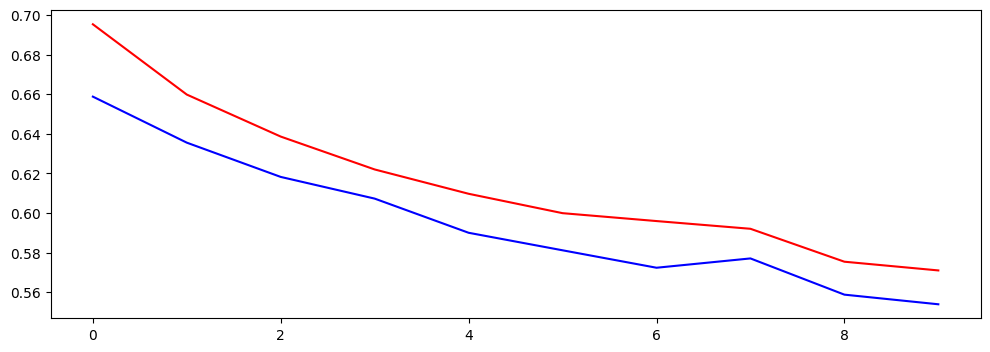

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(fit.history['loss'], label='training loss', color='r')
plt.plot(fit.history['val_loss'],label='validation loss',color='b')
plt.show()

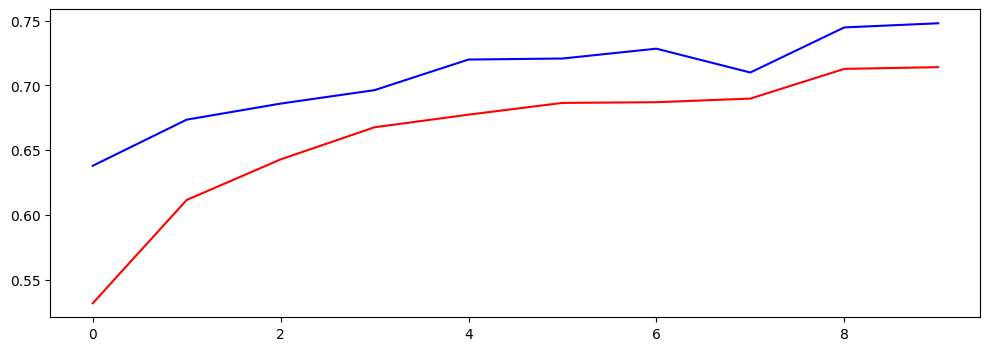

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(fit.history['accuracy'], label='training accuracy', color='r')
plt.plot(fit.history['val_accuracy'],label='validation accuracy',color='b')
plt.show()

# Making Predictions

In [ ]:
pred = model.predict(x_test)

79/79 [==============================] - 28s 352ms/step


In [ ]:
pred[:10]

array([[0.5883882 ],
       [0.26047358],
       [0.38230047],
       [0.51511014],
       [0.30832118],
       [0.2700232 ],
       [0.1878159 ],
       [0.1257992 ],
       [0.4433875 ],
       [0.7639161 ]], dtype=float32)

In [ ]:
# Converting probabilities into 1 and 0
pred = [1 if x>=.5 else 0 for x in pred]

# Checking performance of our model

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1222
           1       0.76      0.73      0.75      1278

    accuracy                           0.75      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.75      0.75      0.75      2500



# Overall model is giving a good performance.